In [5]:
import h5py
import numpy as np 
import scipy as sp

In [6]:
ds1 = h5py.File("./data/hygrip.h5", "r")

In [7]:
ds2 = h5py.File("./data/hygrip_ml.h5", "r")
def printattr(name, obj):
    print(name)
# ds2.visititems(printattr)

# Data Engineering

In [8]:
## Use regular expressions to generate all the `frc` cases (frc/A/1, frc/A/2, frc/B/1 ... etc.)
import sre_yield

In [9]:
# Generate 9 1/5th of a second long force epochs for each 2-second trial



# Generate list for training trials
train_cases = []
for each in sre_yield.AllStrings(r'frc/[A-J]/(1|2)'):
    train_cases.append(each)
    
# Generate list for validation trials
val_cases = []
for each in sre_yield.AllStrings(r'frc/(K|L)/(1|2)'):
    val_cases.append(each)

test_cases = []
for each in sre_yield.AllStrings(r'frc/(M|N)/(1|2)'):
    test_cases.append(each)
    
# Generate training sets

# Generate two separate arrays of of frc epochs, each of shape (channel#, 9*trials, len(trial)/10)

# First frc array, `frc_x` uses trial indexes [0:9] to generate covariates
n_channels = 1
frc_x_train = []
for channel in range(n_channels): #goes through all the channels (in this case, just 1)
    _ch = [] # makes an empty list for each given channel
    for case in train_cases: # iterates through all the cases
        for trial in range(ds2[case].shape[1]): # iterates through all the trials
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] # splits each trial into 10 even divisions, and takes 0:9
            for s in _t:
                _ch.append(s) # appends each epoch to the channel list _ch
    _ch = np.array(_ch) # makes _ch a numpy array
    frc_x_train.append(_ch) # appends each channel to the force list
frc_x_train = np.array(frc_x_train) # makes the force list into a numpy array

# First frc array, `frc_y` uses trial indexes [1:10] to generate the response variable
frc_y_train = []
for channel in range(n_channels):
    _ch = []
    for case in train_cases:
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[1:10] # splits each trial into 10 even divisions, and takes 1:10
            for s in _t:
                _ch.append(s)
    _ch = np.array(_ch)
    frc_y_train.append(_ch)    
frc_y_train = np.array(frc_y_train)


# Generate validation set
# Repeats the same process for the validation set (subjects K and L)

n_channels = 1
frc_x_val = []
for channel in range(n_channels):
    _ch = [] 
    for case in val_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(s) 
    _ch = np.array(_ch)
    frc_x_val.append(_ch)
frc_x_val = np.array(frc_x_val)

frc_y_val = []
for channel in range(n_channels):
    _ch = []
    for case in val_cases:
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[1:10]
            for s in _t:
                _ch.append(s)
    _ch = np.array(_ch)
    frc_y_val.append(_ch)    
frc_y_val = np.array(frc_y_val)

# Generate test set
# Repeats the same process for the test set (subjects M and N)

n_channels = 1
frc_x_test = []
for channel in range(n_channels):
    _ch = [] 
    for case in test_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(s) 
    _ch = np.array(_ch)
    frc_x_test.append(_ch)
frc_x_test = np.array(frc_x_test)


frc_y_test = []
for channel in range(n_channels):
    _ch = []
    for case in test_cases:
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[1:10]
            for s in _t:
                _ch.append(s)
    _ch = np.array(_ch)
    frc_y_test.append(_ch)    
frc_y_test = np.array(frc_y_test)

In [10]:
frc_y_train.shape

(1, 2016, 200)

In [11]:
frc_y_val.shape

(1, 468, 200)

In [12]:
n_channels = 48

# Generate list for training trials
train_cases = []
for each in sre_yield.AllStrings(r'nirs/[A-J]/(1|2)'):
    train_cases.append(each)
    
# Generate list for validation trials
val_cases = []
for each in sre_yield.AllStrings(r'nirs/(K|L)/(1|2)'):
    val_cases.append(each)

test_cases = []
for each in sre_yield.AllStrings(r'nirs/(M|N)/(1|2)'):
    test_cases.append(each)
    
# Generate training sets


nirs_train = []
for channel in range(n_channels): #goes through all the channels
    _ch = [] # makes an empty list for each given channel
    for case in train_cases: # iterates through all the cases
        for trial in range(ds2[case].shape[1]): # iterates through all the trials
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] # splits each trial into 10 even divisions, and takes 0:9
            for s in _t:
                _ch.append(s) # appends each epoch to the channel list _ch
    _ch = np.array(_ch) # makes _ch a numpy array
    nirs_train.append(_ch) # appends each channel to the force list
nirs_train = np.array(nirs_train) # makes the force list into a numpy array



# Generate validation set
# Repeats the same process for the validation set (subjects K and L)
 
nirs_val = []
for channel in range(n_channels):
    _ch = [] 
    for case in val_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(s) 
    _ch = np.array(_ch)
    nirs_val.append(_ch)
nirs_val = np.array(nirs_val)

# Generate test set
# Repeats the same process for the test set (subjects M and N)


nirs_test = []
for channel in range(n_channels):
    _ch = [] 
    for case in test_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(s) 
    _ch = np.array(_ch)
    nirs_test.append(_ch)
nirs_test = np.array(nirs_test)

In [13]:
nirs_train.shape

(48, 2016, 50)

In [14]:
nirs_test.shape

(48, 468, 50)

In [15]:
# Repeats the same process for EEG data

n_channels = 24
cases = []
for each in sre_yield.AllStrings(r'eeg/[A-J]/(1|2)'):
    cases.append(each)

eeg = []
for channel in range(n_channels):
    _ch = []
    for case in cases:
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9]
            for s in _t:
                _ch.append(s)
    _ch = np.array(_ch)
    eeg.append(_ch)    
eeg = np.array(eeg)

In [16]:
n_channels = 24

# Generate list for training trials
train_cases = []
for each in sre_yield.AllStrings(r'eeg/[A-J]/(1|2)'):
    train_cases.append(each)
    
# Generate list for validation trials
val_cases = []
for each in sre_yield.AllStrings(r'eeg/(K|L)/(1|2)'):
    val_cases.append(each)

test_cases = []
for each in sre_yield.AllStrings(r'eeg/(M|N)/(1|2)'):
    test_cases.append(each)
    
# Generate training sets


eeg_train = []
for channel in range(n_channels): #goes through all the channels
    _ch = [] # makes an empty list for each given channel
    for case in train_cases: # iterates through all the cases
        for trial in range(ds2[case].shape[1]): # iterates through all the trials
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] # splits each trial into 10 even divisions, and takes 0:9
            for s in _t:
                _ch.append(np.array(np.array_split(s,10))) # appends each epoch to the channel list _ch
    _ch = np.array(_ch) # makes _ch a numpy array
    eeg_train.append(_ch) # appends each channel to the force list
eeg_train = np.array(eeg_train) # makes the force list into a numpy array



# Generate validation set
# Repeats the same process for the validation set (subjects K and L)
 
eeg_val = []
for channel in range(n_channels):
    _ch = [] 
    for case in val_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(np.array(np.array_split(s,10)))
    _ch = np.array(_ch)
    eeg_val.append(_ch)
eeg_val = np.array(eeg_val)

# Generate test set
# Repeats the same process for the test set (subjects M and N)


eeg_test = []
for channel in range(n_channels):
    _ch = [] 
    for case in test_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(np.array(np.array_split(s,10)))
    _ch = np.array(_ch)
    eeg_test.append(_ch)
eeg_test = np.array(eeg_test)

In [17]:
eeg_train.shape

(24, 2016, 10, 200)

In [18]:
ds2["eog"]

<HDF5 group "/eog" (14 members)>

In [19]:
cases = []
for each in sre_yield.AllStrings(r'emg/[A-J]/(1|2)'):
    cases.append(each)

emg = []
for channel in range(4):
    _ch = []
    for case in cases:
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9]
            for s in _t:
                _ch.append(s)
    _ch = np.array(_ch)
    emg.append(_ch)    
emg = np.array(emg)

In [20]:
n_channels = 4

# Generate list for training trials
train_cases = []
for each in sre_yield.AllStrings(r'emg/[A-J]/(1|2)'):
    train_cases.append(each)
    
# Generate list for validation trials
val_cases = []
for each in sre_yield.AllStrings(r'emg/(K|L)/(1|2)'):
    val_cases.append(each)

test_cases = []
for each in sre_yield.AllStrings(r'emg/(M|N)/(1|2)'):
    test_cases.append(each)
    
# Generate training sets


emg_train = []
for channel in range(n_channels): #goes through all the channels 
    _ch = [] # makes an empty list for each given channel
    for case in train_cases: # iterates through all the cases
        for trial in range(ds2[case].shape[1]): # iterates through all the trials
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] # splits each trial into 10 even divisions, and takes 0:9
            for s in _t:
                _ch.append(np.array(np.array_split(s,10))) # extra split for LSTM
    _ch = np.array(_ch) # makes _ch a numpy array
    emg_train.append(_ch) # appends each channel to the force list
emg_train = np.array(emg_train) # makes the force list into a numpy array



# Generate validation set
# Repeats the same process for the validation set (subjects K and L)
 
emg_val = []
for channel in range(n_channels):
    _ch = [] 
    for case in val_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(np.array(np.array_split(s,10))) # extra split for LSTM
    _ch = np.array(_ch)
    emg_val.append(_ch)
emg_val = np.array(emg_val)

# Generate test set
# Repeats the same process for the test set (subjects M and N)


emg_test = []
for channel in range(n_channels):
    _ch = [] 
    for case in test_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(np.array(np.array_split(s,10))) # extra split for LSTM
    _ch = np.array(_ch)
    emg_test.append(_ch)
emg_test = np.array(emg_test)

In [21]:
emg_test[0,:,:].shape

(468, 10, 200)

In [22]:
ds2["emg/A/1"]

<HDF5 dataset "1": shape (1, 10, 4, 20000), type "<f8">

In [23]:
n_channels = 1

# Generate list for training trials
train_cases = []
for each in sre_yield.AllStrings(r'eog/[A-J]/(1|2)'):
    train_cases.append(each)
    
# Generate list for validation trials
val_cases = []
for each in sre_yield.AllStrings(r'eog/(K|L)/(1|2)'):
    val_cases.append(each)

test_cases = []
for each in sre_yield.AllStrings(r'eog/(M|N)/(1|2)'):
    test_cases.append(each)
    
# Generate training sets


eog_train = []
for channel in range(n_channels): #goes through all the channels 
    _ch = [] # makes an empty list for each given channel
    for case in train_cases: # iterates through all the cases
        for trial in range(ds2[case].shape[1]): # iterates through all the trials
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] # splits each trial into 10 even divisions, and takes 0:9
            for s in _t:
                _ch.append(s) # appends each epoch to the channel list _ch
    _ch = np.array(_ch) # makes _ch a numpy array
    eog_train.append(_ch) # appends each channel to the force list
eog_train = np.array(eog_train) # makes the force list into a numpy array



# Generate validation set
# Repeats the same process for the validation set (subjects K and L)
 
eog_val = []
for channel in range(n_channels):
    _ch = [] 
    for case in val_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(s) 
    _ch = np.array(_ch)
    eog_val.append(_ch)
eog_val = np.array(eog_val)

# Generate test set
# Repeats the same process for the test set (subjects M and N)


eog_test = []
for channel in range(n_channels):
    _ch = [] 
    for case in test_cases: 
        for trial in range(ds2[case].shape[1]):
            _t = np.array_split(ds2[case][0,trial,channel,:], 10)[0:9] 
            for s in _t:
                _ch.append(s) 
    _ch = np.array(_ch)
    eog_test.append(_ch)
eog_test = np.array(eog_test)

In [24]:
eog_train.shape

(1, 2016, 200)

# Model Building

First, we build a series of encoder-decoder models that try to predict `frc_y` from each channel from each modality

In [25]:
from keras.layers import Input, Dense, Conv1D, concatenate, BatchNormalization, LSTM
from keras import Model
from keras.optimizers import SGD, Nadam

In [26]:
input_frc = Input(shape=(None, 200))
hidden_frc = Dense(400, activation="relu")(input_frc)
output_frc = Dense(200, name="output")(hidden_frc)
frc_model = Model(inputs=[input_frc], outputs=[output_frc])

In [27]:
frc_model.compile(loss="mse", optimizer=Nadam())

In [28]:
n_epochs= 30
n_batch_size = int(2016/4)

frc_history = frc_model.fit(frc_x_train, frc_y_train, 
                            epochs=n_epochs, batch_size = n_batch_size,
                            validation_data=(frc_x_val, frc_y_val),
                            verbose=False)

In [29]:
print(round(frc_model.evaluate(frc_x_test[0,:,:], frc_y_test[0,:,:], verbose=True),5))

15/15 [==============================] - 0s 2ms/step - loss: 0.0106
0.01058


In [30]:
frc_predictions = frc_model.predict(frc_x_val)

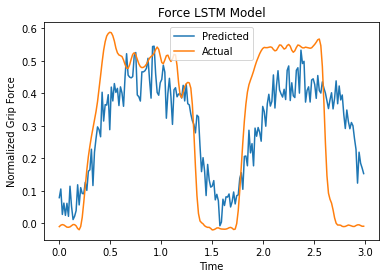

In [39]:
x = [i*3/200 for i in range(200)]
plt.plot(x, frc_predictions[0,2,:], label='Predicted')
plt.ylabel("Normalized Grip Force")
plt.xlabel("Time")
plt.title('Force LSTM Model')
plt.plot(x, frc_y_train[0,2,:], label='Actual')
plt.legend()

In [31]:
frc_predictions.shape

(1, 468, 200)

# fNIRS Channel Models; Left and Right Hemisphere Model

In [52]:
from keras.layers import Input, Dense, Conv1D, concatenate, BatchNormalization, LSTM
from keras import Model
from keras.optimizers import SGD, Nadam

In [53]:
# fNIRS Left Hemisphere Channel Models

n_epochs= 30
n_batch_size = int(2016/4)


## Channel 1 (Left Hemisphere)
oxy = 0 #index for oxygenated data for channel
deo = 1 #index for deoxygenated data for channel
input_nirs0 = Input(shape=(50)) # Channel 1, Oxygenated
input_nirs1 = Input(shape=(50)) # Channel 1, Deoxygenated

hidden_nirs0 = Dense(50,activation="relu")(input_nirs0)
hidden_nirs1 = Dense(50,activation="relu")(input_nirs1)

#hidden_nirs0 = Conv1D(filters=50,kernel_size=10, strides=1, 
#                      padding="same", activation="relu")(input_nirs0)
#hidden_nirs1 = Conv1D(filters=50,kernel_size=10, strides=1, 
#                      padding="same", activation="relu")(input_nirs1)

concat_nirs_ch1 = concatenate([hidden_nirs0, hidden_nirs1])
hidden_nirs_ch1 = Dense(50, activation="relu")(concat_nirs_ch1)
output_nirs_ch1 = Dense(200, name="output")(hidden_nirs_ch1)

nirs_ch1_model = Model(inputs=[input_nirs0, input_nirs1], outputs=[output_nirs_ch1])

nirs_ch1_model.compile(loss="mse", optimizer=Nadam())
n_epochs= 4
n_batch_size = int(2016/4)


nirs_ch1_history = nirs_ch1_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch1_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))

## Channel 2 (Left Hemisphere)
oxy = 2
deo = 3

input_nirs2 = Input(shape=(50))
input_nirs3 = Input(shape=(50))

hidden_nirs2 = Dense(50,activation="relu")(input_nirs2)
hidden_nirs3 = Dense(50,activation="relu")(input_nirs3)

concat_nirs_ch2 = concatenate([hidden_nirs2, hidden_nirs3])
hidden_nirs_ch2 = Dense(50, activation="relu")(concat_nirs_ch2)
output_nirs_ch2 = Dense(200, name="output")(hidden_nirs_ch2)


nirs_ch2_model = Model(inputs=[input_nirs2, input_nirs3], outputs=[output_nirs_ch2])

nirs_ch2_model.compile(loss="mse", optimizer=Nadam())

nirs_ch2_history = nirs_ch2_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch2_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 3 (Left Hemisphere)
oxy = 4
deo = 5

input_nirs4 = Input(shape=(50))
input_nirs5 = Input(shape=(50))

hidden_nirs4 = Dense(50,activation="relu")(input_nirs4)
hidden_nirs5 = Dense(50,activation="relu")(input_nirs5)

concat_nirs_ch3 = concatenate([hidden_nirs4, hidden_nirs5])
hidden_nirs_ch3 = Dense(50, activation="relu")(concat_nirs_ch3)
output_nirs_ch3 = Dense(200, name="output")(hidden_nirs_ch3)


nirs_ch3_model = Model(inputs=[input_nirs4, input_nirs5], outputs=[output_nirs_ch3])

nirs_ch3_model.compile(loss="mse", optimizer=Nadam())

nirs_ch3_history = nirs_ch3_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch3_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 4 (Left Hemisphere)
oxy = 6
deo = 7

input_nirs6 = Input(shape=(50))
input_nirs7 = Input(shape=(50))

hidden_nirs6 = Dense(50,activation="relu")(input_nirs6)
hidden_nirs7 = Dense(50,activation="relu")(input_nirs7)

concat_nirs_ch4 = concatenate([hidden_nirs6, hidden_nirs7])
hidden_nirs_ch4 = Dense(50, activation="relu")(concat_nirs_ch4)
output_nirs_ch4 = Dense(200, name="output")(hidden_nirs_ch4)


nirs_ch4_model = Model(inputs=[input_nirs6, input_nirs7], outputs=[output_nirs_ch4])

nirs_ch4_model.compile(loss="mse", optimizer=Nadam())

nirs_ch4_history = nirs_ch4_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch4_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 5 (Left Hemisphere)
oxy = 8
deo = 9

input_nirs8 = Input(shape=(50))
input_nirs9 = Input(shape=(50))

hidden_nirs8 = Dense(50,activation="relu")(input_nirs8)
hidden_nirs9 = Dense(50,activation="relu")(input_nirs9)

concat_nirs_ch5 = concatenate([hidden_nirs8, hidden_nirs9])
hidden_nirs_ch5 = Dense(50, activation="relu")(concat_nirs_ch5)
output_nirs_ch5 = Dense(200, name="output")(hidden_nirs_ch5)


nirs_ch5_model = Model(inputs=[input_nirs8, input_nirs9], outputs=[output_nirs_ch5])

nirs_ch5_model.compile(loss="mse", optimizer=Nadam())


nirs_ch5_history = nirs_ch5_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch5_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 6 (Left Hemisphere)
oxy = 10
deo = 11

input_nirs10 = Input(shape=(50))
input_nirs11 = Input(shape=(50))

hidden_nirs10 = Dense(50,activation="relu")(input_nirs10)
hidden_nirs11 = Dense(50,activation="relu")(input_nirs11)

concat_nirs_ch6 = concatenate([hidden_nirs10, hidden_nirs11])
hidden_nirs_ch6 = Dense(50, activation="relu")(concat_nirs_ch6)
output_nirs_ch6 = Dense(200, name="output")(hidden_nirs_ch6)


nirs_ch6_model = Model(inputs=[input_nirs10, input_nirs11], outputs=[output_nirs_ch6])

nirs_ch6_model.compile(loss="mse", optimizer=Nadam())

nirs_ch6_history = nirs_ch6_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch6_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 7 (Left Hemisphere)
oxy = 12
deo = 13

input_nirs12 = Input(shape=(50))
input_nirs13 = Input(shape=(50))

hidden_nirs12 = Dense(50,activation="relu")(input_nirs12)
hidden_nirs13 = Dense(50,activation="relu")(input_nirs13)

concat_nirs_ch7 = concatenate([hidden_nirs12, hidden_nirs13])
hidden_nirs_ch7 = Dense(50, activation="relu")(concat_nirs_ch7)
output_nirs_ch7 = Dense(200, name="output")(hidden_nirs_ch7)


nirs_ch7_model = Model(inputs=[input_nirs12, input_nirs13], outputs=[output_nirs_ch7])

nirs_ch7_model.compile(loss="mse", optimizer=Nadam())

nirs_ch7_history = nirs_ch7_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch7_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 8 (Left Hemisphere)
oxy = 14
deo = 15

input_nirs14 = Input(shape=(50))
input_nirs15 = Input(shape=(50))

hidden_nirs14 = Dense(50,activation="relu")(input_nirs14)
hidden_nirs15 = Dense(50,activation="relu")(input_nirs15)

concat_nirs_ch8 = concatenate([hidden_nirs14, hidden_nirs15])
hidden_nirs_ch8 = Dense(50, activation="relu")(concat_nirs_ch8)
output_nirs_ch8 = Dense(200, name="output")(hidden_nirs_ch8)


nirs_ch8_model = Model(inputs=[input_nirs14, input_nirs15], outputs=[output_nirs_ch8])

nirs_ch8_model.compile(loss="mse", optimizer=Nadam())

nirs_ch8_history = nirs_ch8_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch8_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 9 (Left Hemisphere)
oxy = 16
deo = 17

input_nirs16 = Input(shape=(50))
input_nirs17 = Input(shape=(50))

hidden_nirs16 = Dense(50,activation="relu")(input_nirs16)
hidden_nirs17 = Dense(50,activation="relu")(input_nirs17)

concat_nirs_ch9 = concatenate([hidden_nirs16, hidden_nirs17])
hidden_nirs_ch9 = Dense(50, activation="relu")(concat_nirs_ch9)
output_nirs_ch9 = Dense(200, name="output")(hidden_nirs_ch9)


nirs_ch9_model = Model(inputs=[input_nirs16, input_nirs17], outputs=[output_nirs_ch9])

nirs_ch9_model.compile(loss="mse", optimizer=Nadam())

nirs_ch9_history = nirs_ch9_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch9_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 10 (Left Hemisphere)
oxy = 18
deo = 19

input_nirs18 = Input(shape=(50))
input_nirs19 = Input(shape=(50))

hidden_nirs18 = Dense(50,activation="relu")(input_nirs18)
hidden_nirs19 = Dense(50,activation="relu")(input_nirs19)

concat_nirs_ch10 = concatenate([hidden_nirs18, hidden_nirs19])
hidden_nirs_ch10 = Dense(50, activation="relu")(concat_nirs_ch10)
output_nirs_ch10 = Dense(200, name="output")(hidden_nirs_ch10)


nirs_ch10_model = Model(inputs=[input_nirs18, input_nirs19], outputs=[output_nirs_ch10])

nirs_ch10_model.compile(loss="mse", optimizer=Nadam())

nirs_ch10_history = nirs_ch10_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch10_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 11 (Left Hemisphere)
oxy = 20
deo = 21

input_nirs20 = Input(shape=(50))
input_nirs21 = Input(shape=(50))

hidden_nirs20 = Dense(50,activation="relu")(input_nirs20)
hidden_nirs21 = Dense(50,activation="relu")(input_nirs21)

concat_nirs_ch11 = concatenate([hidden_nirs20, hidden_nirs21])
hidden_nirs_ch11 = Dense(50, activation="relu")(concat_nirs_ch11)
output_nirs_ch11 = Dense(200, name="output")(hidden_nirs_ch11)


nirs_ch11_model = Model(inputs=[input_nirs20, input_nirs21], outputs=[output_nirs_ch11])

nirs_ch11_model.compile(loss="mse", optimizer=Nadam())

nirs_ch11_history = nirs_ch11_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch11_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 12 (Left Hemisphere)
oxy = 22
deo = 23

input_nirs22 = Input(shape=(50))
input_nirs23 = Input(shape=(50))

hidden_nirs22 = Dense(50,activation="relu")(input_nirs22)
hidden_nirs23 = Dense(50,activation="relu")(input_nirs23)

concat_nirs_ch12 = concatenate([hidden_nirs22, hidden_nirs23])
hidden_nirs_ch12 = Dense(50, activation="relu")(concat_nirs_ch12)
output_nirs_ch12 = Dense(200, name="output")(hidden_nirs_ch12)


nirs_ch12_model = Model(inputs=[input_nirs22, input_nirs23], outputs=[output_nirs_ch12])

nirs_ch12_model.compile(loss="mse", optimizer=Nadam())

nirs_ch12_history = nirs_ch12_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch12_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))

0.03986
0.03987
0.04107
0.03982
0.03922
0.04154
0.04056
0.0399
0.03939
0.0395
0.03951
0.04038


In [54]:
# Lock fNIRS lower layers

# Lock bottom layer
hidden_nirs0.trainable = False
hidden_nirs1.trainable = False
hidden_nirs2.trainable = False
hidden_nirs3.trainable = False
hidden_nirs4.trainable = False
hidden_nirs5.trainable = False
hidden_nirs6.trainable = False
hidden_nirs7.trainable = False
hidden_nirs8.trainable = False
hidden_nirs9.trainable = False
hidden_nirs10.trainable = False
hidden_nirs11.trainable = False
hidden_nirs12.trainable = False
hidden_nirs13.trainable = False
hidden_nirs14.trainable = False
hidden_nirs15.trainable = False
hidden_nirs16.trainable = False
hidden_nirs17.trainable = False
hidden_nirs18.trainable = False
hidden_nirs19.trainable = False
hidden_nirs20.trainable = False
hidden_nirs21.trainable = False
hidden_nirs22.trainable = False
hidden_nirs23.trainable = False

# Lock channel layer
hidden_nirs_ch1.trainable = False
hidden_nirs_ch2.trainable = False
hidden_nirs_ch3.trainable = False
hidden_nirs_ch4.trainable = False
hidden_nirs_ch5.trainable = False
hidden_nirs_ch6.trainable = False
hidden_nirs_ch7.trainable = False
hidden_nirs_ch8.trainable = False
hidden_nirs_ch9.trainable = False
hidden_nirs_ch10.trainable = False
hidden_nirs_ch11.trainable = False
hidden_nirs_ch12.trainable = False

In [55]:
# fNIRS Left Hemisphere Hierarchical Model (C3 Region)
n_epochs= 10
n_batch_size = int(2016/4)


concat_nirs_c3 = concatenate([hidden_nirs_ch1, hidden_nirs_ch2, hidden_nirs_ch3,
                       hidden_nirs_ch4, hidden_nirs_ch5, hidden_nirs_ch6,
                       hidden_nirs_ch7, hidden_nirs_ch8, hidden_nirs_ch9,
                       hidden_nirs_ch10, hidden_nirs_ch11, hidden_nirs_ch10])
hidden_nirs_c3 = Dense(400, activation="relu")(concat_nirs_c3)
output_nirs_c3 = Dense(200, name="output")(hidden_nirs_c3)


inputs_nirs_c3 = [input_nirs0, input_nirs1, input_nirs2, input_nirs3,
                  input_nirs4, input_nirs5, input_nirs6, input_nirs7,
                  input_nirs8, input_nirs9, input_nirs10, input_nirs11,
                  input_nirs12, input_nirs13, input_nirs14, input_nirs15,
                  input_nirs16, input_nirs17, input_nirs18, input_nirs19,
                  input_nirs20, input_nirs21, input_nirs22, input_nirs23]

nirs_c3_model = Model(inputs=inputs_nirs_c3,
                     outputs=[output_nirs_c3])
nirs_c3_model.compile(loss="mse", optimizer=Nadam())



nirs_c3_train = [nirs_train[i,:,:] for i in range(24)] # collect all the training inputs
nirs_c3_val = [nirs_val[i,:,:] for i in range(24)] # collect all the validation inputs

nirs_c3_history = nirs_c3_model.fit(nirs_c3_train, frc_y_train[0,:,:],
                                    epochs=n_epochs, batch_size = n_batch_size,
                                    validation_data=(nirs_c3_val, frc_y_val[0,:,:]),
                                    verbose=True)

Epoch 1/10
4/4 [==============================] - 4s 105ms/step - loss: 0.0380 - val_loss: 0.0387
Epoch 2/10
4/4 [==============================] - 0s 30ms/step - loss: 0.0282 - val_loss: 0.0312
Epoch 3/10
4/4 [==============================] - 0s 32ms/step - loss: 0.0234 - val_loss: 0.0295
Epoch 4/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0226 - val_loss: 0.0291
Epoch 5/10
4/4 [==============================] - 0s 31ms/step - loss: 0.0226 - val_loss: 0.0292
Epoch 6/10
4/4 [==============================] - 0s 31ms/step - loss: 0.0228 - val_loss: 0.0293
Epoch 7/10
4/4 [==============================] - 0s 32ms/step - loss: 0.0225 - val_loss: 0.0292
Epoch 8/10
4/4 [==============================] - 0s 32ms/step - loss: 0.0227 - val_loss: 0.0292
Epoch 9/10
4/4 [==============================] - 0s 30ms/step - loss: 0.0229 - val_loss: 0.0291
Epoch 10/10
4/4 [==============================] - 0s 31ms/step - loss: 0.0227 - val_loss: 0.0298


In [56]:
nirs_c3_test = [nirs_test[i,:,:] for i in range(24)]
print(round(nirs_c3_model.evaluate(nirs_c3_test, frc_y_test[0,:,:], verbose=True), 5))

15/15 [==============================] - 0s 1ms/step - loss: 0.0270
0.02697


In [61]:
nirs_c3_predictions = nirs_c3_model.predict(nirs_c3_test)
nirs_c3_predictions.shape

(468, 200)

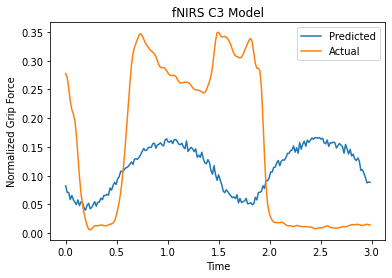

In [65]:
x = [i*3/200 for i in range(200)]
plt.plot(x, nirs_c3_predictions[150,:], label='Predicted')
plt.ylabel("Normalized Grip Force")
plt.xlabel("Time")
plt.title('fNIRS C3 Model')
plt.plot(x, frc_y_test[0,150,:], label='Actual')
plt.legend()

In [38]:
# fNIRS Right Hemisphere Channel Models

n_epochs= 30
n_batch_size = int(2016/4)

## Channel 13 (Right Hemisphere)
oxy = 24
deo = 25

input_nirs24 = Input(shape=(50))
input_nirs25 = Input(shape=(50))

hidden_nirs24 = Dense(50,activation="relu")(input_nirs24)
hidden_nirs25 = Dense(50,activation="relu")(input_nirs25)

concat_nirs_ch13 = concatenate([hidden_nirs24, hidden_nirs25])
hidden_nirs_ch13 = Dense(50, activation="relu")(concat_nirs_ch13)
output_nirs_ch13 = Dense(200, name="output")(hidden_nirs_ch13)


nirs_ch13_model = Model(inputs=[input_nirs24, input_nirs25], outputs=[output_nirs_ch13])

nirs_ch13_model.compile(loss="mse", optimizer=Nadam())

nirs_ch13_history = nirs_ch13_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch13_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 14 (Right Hemisphere)
oxy = 26
deo = 27

input_nirs26 = Input(shape=(50))
input_nirs27 = Input(shape=(50))

hidden_nirs26 = Dense(50,activation="relu")(input_nirs26)
hidden_nirs27 = Dense(50,activation="relu")(input_nirs27)

concat_nirs_ch14 = concatenate([hidden_nirs26, hidden_nirs27])
hidden_nirs_ch14 = Dense(50, activation="relu")(concat_nirs_ch14)
output_nirs_ch14 = Dense(200, name="output")(hidden_nirs_ch14)


nirs_ch14_model = Model(inputs=[input_nirs26, input_nirs27], outputs=[output_nirs_ch14])

nirs_ch14_model.compile(loss="mse", optimizer=Nadam())

nirs_ch14_history = nirs_ch14_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch14_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 15 (Right Hemisphere)
oxy = 28
deo = 29

input_nirs28 = Input(shape=(50))
input_nirs29 = Input(shape=(50))

hidden_nirs28 = Dense(50,activation="relu")(input_nirs28)
hidden_nirs29 = Dense(50,activation="relu")(input_nirs29)

concat_nirs_ch15 = concatenate([hidden_nirs28, hidden_nirs29])
hidden_nirs_ch15 = Dense(50, activation="relu")(concat_nirs_ch15)
output_nirs_ch15 = Dense(200, name="output")(hidden_nirs_ch15)


nirs_ch15_model = Model(inputs=[input_nirs28, input_nirs29], outputs=[output_nirs_ch15])

nirs_ch15_model.compile(loss="mse", optimizer=Nadam())

nirs_ch15_history = nirs_ch15_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch15_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 16 (Right Hemisphere)
oxy = 30
deo = 31

input_nirs30 = Input(shape=(50))
input_nirs31 = Input(shape=(50))

hidden_nirs30 = Dense(50,activation="relu")(input_nirs30)
hidden_nirs31 = Dense(50,activation="relu")(input_nirs31)

concat_nirs_ch16 = concatenate([hidden_nirs30, hidden_nirs31])
hidden_nirs_ch16 = Dense(50, activation="relu")(concat_nirs_ch16)
output_nirs_ch16 = Dense(200, name="output")(hidden_nirs_ch16)


nirs_ch16_model = Model(inputs=[input_nirs30, input_nirs31], outputs=[output_nirs_ch16])

nirs_ch16_model.compile(loss="mse", optimizer=Nadam())

nirs_ch16_history = nirs_ch16_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch16_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))




## Channel 17 (Right Hemisphere)
oxy = 32
deo = 33

input_nirs32 = Input(shape=(50))
input_nirs33 = Input(shape=(50))

hidden_nirs32 = Dense(50,activation="relu")(input_nirs32)
hidden_nirs33 = Dense(50,activation="relu")(input_nirs33)

concat_nirs_ch17 = concatenate([hidden_nirs32, hidden_nirs33])
hidden_nirs_ch17 = Dense(50, activation="relu")(concat_nirs_ch17)
output_nirs_ch17 = Dense(200, name="output")(hidden_nirs_ch17)


nirs_ch17_model = Model(inputs=[input_nirs32, input_nirs33], outputs=[output_nirs_ch17])

nirs_ch17_model.compile(loss="mse", optimizer=Nadam())

nirs_ch17_history = nirs_ch17_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch17_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 18 (Right Hemisphere)
oxy = 34
deo = 35

input_nirs34 = Input(shape=(50))
input_nirs35 = Input(shape=(50))

hidden_nirs34 = Dense(50,activation="relu")(input_nirs34)
hidden_nirs35 = Dense(50,activation="relu")(input_nirs35)

concat_nirs_ch18 = concatenate([hidden_nirs34, hidden_nirs35])
hidden_nirs_ch18 = Dense(50, activation="relu")(concat_nirs_ch18)
output_nirs_ch18 = Dense(200, name="output")(hidden_nirs_ch18)


nirs_ch18_model = Model(inputs=[input_nirs34, input_nirs35], outputs=[output_nirs_ch18])

nirs_ch18_model.compile(loss="mse", optimizer=Nadam())

nirs_ch18_history = nirs_ch18_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch18_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))




## Channel 19 (Right Hemisphere)
oxy = 36
deo = 37

input_nirs36 = Input(shape=(50))
input_nirs37 = Input(shape=(50))

hidden_nirs36 = Dense(50,activation="relu")(input_nirs36)
hidden_nirs37 = Dense(50,activation="relu")(input_nirs37)

concat_nirs_ch19 = concatenate([hidden_nirs36, hidden_nirs37])
hidden_nirs_ch19 = Dense(50, activation="relu")(concat_nirs_ch19)
output_nirs_ch19 = Dense(200, name="output")(hidden_nirs_ch19)


nirs_ch19_model = Model(inputs=[input_nirs36, input_nirs37], outputs=[output_nirs_ch19])

nirs_ch19_model.compile(loss="mse", optimizer=Nadam())

nirs_ch19_history = nirs_ch19_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch19_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))




## Channel 20 (Right Hemisphere)
oxy = 38
deo = 39

input_nirs38 = Input(shape=(50))
input_nirs39 = Input(shape=(50))

hidden_nirs38 = Dense(50,activation="relu")(input_nirs38)
hidden_nirs39 = Dense(50,activation="relu")(input_nirs39)

concat_nirs_ch20 = concatenate([hidden_nirs38, hidden_nirs39])
hidden_nirs_ch20 = Dense(50, activation="relu")(concat_nirs_ch20)
output_nirs_ch20 = Dense(200, name="output")(hidden_nirs_ch20)


nirs_ch20_model = Model(inputs=[input_nirs38, input_nirs39], outputs=[output_nirs_ch20])

nirs_ch20_model.compile(loss="mse", optimizer=Nadam())

nirs_ch20_history = nirs_ch20_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch20_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))




## Channel 21 (Right Hemisphere)
oxy = 40
deo = 41

input_nirs40 = Input(shape=(50))
input_nirs41 = Input(shape=(50))

hidden_nirs40 = Dense(50,activation="relu")(input_nirs40)
hidden_nirs41 = Dense(50,activation="relu")(input_nirs41)

concat_nirs_ch21 = concatenate([hidden_nirs40, hidden_nirs41])
hidden_nirs_ch21 = Dense(50, activation="relu")(concat_nirs_ch21)
output_nirs_ch21 = Dense(200, name="output")(hidden_nirs_ch21)


nirs_ch21_model = Model(inputs=[input_nirs40, input_nirs41], outputs=[output_nirs_ch21])

nirs_ch21_model.compile(loss="mse", optimizer=Nadam())

nirs_ch21_history = nirs_ch21_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch21_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 22 (Right Hemisphere)
oxy = 42
deo = 43

input_nirs42 = Input(shape=(50))
input_nirs43 = Input(shape=(50))

hidden_nirs42 = Dense(50,activation="relu")(input_nirs42)
hidden_nirs43 = Dense(50,activation="relu")(input_nirs43)

concat_nirs_ch22 = concatenate([hidden_nirs42, hidden_nirs43])
hidden_nirs_ch22 = Dense(50, activation="relu")(concat_nirs_ch22)
output_nirs_ch22 = Dense(200, name="output")(hidden_nirs_ch22)


nirs_ch22_model = Model(inputs=[input_nirs42, input_nirs43], outputs=[output_nirs_ch22])

nirs_ch22_model.compile(loss="mse", optimizer=Nadam())

nirs_ch22_history = nirs_ch22_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch22_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 23 (Right Hemisphere)
oxy = 44
deo = 45

input_nirs44 = Input(shape=(50))
input_nirs45 = Input(shape=(50))

hidden_nirs44 = Dense(50,activation="relu")(input_nirs44)
hidden_nirs45 = Dense(50,activation="relu")(input_nirs45)

concat_nirs_ch23 = concatenate([hidden_nirs44, hidden_nirs45])
hidden_nirs_ch23 = Dense(50, activation="relu")(concat_nirs_ch23)
output_nirs_ch23 = Dense(200, name="output")(hidden_nirs_ch23)


nirs_ch23_model = Model(inputs=[input_nirs44, input_nirs45], outputs=[output_nirs_ch23])

nirs_ch23_model.compile(loss="mse", optimizer=Nadam())

nirs_ch23_history = nirs_ch23_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch23_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))



## Channel 24 (Right Hemisphere)
oxy = 46
deo = 47

input_nirs46 = Input(shape=(50))
input_nirs47 = Input(shape=(50))

hidden_nirs46 = Dense(50,activation="relu")(input_nirs46)
hidden_nirs47 = Dense(50,activation="relu")(input_nirs47)

concat_nirs_ch24 = concatenate([hidden_nirs46, hidden_nirs47])
hidden_nirs_ch24 = Dense(50, activation="relu")(concat_nirs_ch24)
output_nirs_ch24 = Dense(200, name="output")(hidden_nirs_ch24)


nirs_ch24_model = Model(inputs=[input_nirs46, input_nirs47], outputs=[output_nirs_ch24])

nirs_ch24_model.compile(loss="mse", optimizer=Nadam())

nirs_ch24_history = nirs_ch24_model.fit([nirs_train[oxy,:,:], nirs_train[deo,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([nirs_val[oxy,:,:], nirs_val[deo,:,:]], frc_y_val[0,:,:]),
                                      verbose=False)

print(round(nirs_ch24_model.evaluate([nirs_test[oxy,:,:], nirs_test[deo,:,:]], frc_y_test[0,:,:], verbose=False),5))

0.02626
0.02628
0.02625
0.02629
0.02627
0.02629
0.02636
0.0263
0.02628
0.02628
0.0263
0.02629


In [39]:
# Lock the lower layers of the fNIRS C4 region

# Lock lowest layers
hidden_nirs24.trainable = False
hidden_nirs25.trainable = False
hidden_nirs26.trainable = False
hidden_nirs27.trainable = False
hidden_nirs28.trainable = False
hidden_nirs29.trainable = False
hidden_nirs30.trainable = False
hidden_nirs31.trainable = False
hidden_nirs32.trainable = False
hidden_nirs33.trainable = False
hidden_nirs34.trainable = False
hidden_nirs35.trainable = False
hidden_nirs36.trainable = False
hidden_nirs37.trainable = False
hidden_nirs38.trainable = False
hidden_nirs39.trainable = False
hidden_nirs40.trainable = False
hidden_nirs41.trainable = False
hidden_nirs42.trainable = False
hidden_nirs43.trainable = False
hidden_nirs44.trainable = False
hidden_nirs45.trainable = False
hidden_nirs46.trainable = False
hidden_nirs47.trainable = False

# Lock channel layers
hidden_nirs_ch13.trainable = False
hidden_nirs_ch14.trainable = False
hidden_nirs_ch15.trainable = False
hidden_nirs_ch16.trainable = False
hidden_nirs_ch17.trainable = False
hidden_nirs_ch18.trainable = False
hidden_nirs_ch19.trainable = False
hidden_nirs_ch20.trainable = False
hidden_nirs_ch21.trainable = False
hidden_nirs_ch22.trainable = False
hidden_nirs_ch23.trainable = False
hidden_nirs_ch24.trainable = False

In [40]:
# fNIRS Right Hemisphere Hierarchical Model (C4 Region)

n_epochs= 10
n_batch_size = int(2016/4)

concat_nirs_c4 = concatenate([hidden_nirs_ch13, hidden_nirs_ch14, hidden_nirs_ch15,
                       hidden_nirs_ch16, hidden_nirs_ch17, hidden_nirs_ch18,
                       hidden_nirs_ch19, hidden_nirs_ch20, hidden_nirs_ch21,
                       hidden_nirs_ch22, hidden_nirs_ch23, hidden_nirs_ch24])
hidden_nirs_c4 = Dense(400, activation="relu")(concat_nirs_c4)
output_nirs_c4 = Dense(200, name="output")(hidden_nirs_c4)


inputs_nirs_c4 = [input_nirs24, input_nirs25, input_nirs26, input_nirs27,
                  input_nirs28, input_nirs29, input_nirs30, input_nirs31,
                  input_nirs32, input_nirs33, input_nirs34, input_nirs35,
                  input_nirs36, input_nirs37, input_nirs38, input_nirs39,
                  input_nirs40, input_nirs41, input_nirs42, input_nirs43,
                  input_nirs44, input_nirs45, input_nirs46, input_nirs47]
nirs_c4_model = Model(inputs=inputs_nirs_c4,
                     outputs=[output_nirs_c4])

nirs_c4_model.compile(loss="mse", optimizer=Nadam())



nirs_c4_train = [nirs_train[i,:,:] for i in range(24,48)] # collect all the training inputs
nirs_c4_val = [nirs_val[i,:,:] for i in range(24,48)] # collect all the validation inputs

nirs_c4_history = nirs_c4_model.fit(nirs_c4_train, frc_y_train[0,:,:],
                                    epochs=n_epochs, batch_size = n_batch_size,
                                    validation_data=(nirs_c3_val, frc_y_val[0,:,:]),
                                    verbose=True)

Epoch 1/10
4/4 [==============================] - 4s 107ms/step - loss: 0.0421 - val_loss: 0.0380
Epoch 2/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0286 - val_loss: 0.0317
Epoch 3/10
4/4 [==============================] - 0s 28ms/step - loss: 0.0237 - val_loss: 0.0295
Epoch 4/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0229 - val_loss: 0.0293
Epoch 5/10
4/4 [==============================] - 0s 31ms/step - loss: 0.0225 - val_loss: 0.0293
Epoch 6/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0228 - val_loss: 0.0292
Epoch 7/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0226 - val_loss: 0.0291
Epoch 8/10
4/4 [==============================] - 0s 30ms/step - loss: 0.0225 - val_loss: 0.0293
Epoch 9/10
4/4 [==============================] - 0s 28ms/step - loss: 0.0227 - val_loss: 0.0292
Epoch 10/10
4/4 [==============================] - 0s 31ms/step - loss: 0.0227 - val_loss: 0.0292


In [41]:
nirs_c4_test = [nirs_test[i,:,:] for i in range(24,48)]
print(round(nirs_c4_model.evaluate(nirs_c4_test, frc_y_test[0,:,:], verbose=True), 5))

15/15 [==============================] - 0s 985us/step - loss: 0.0263
0.02625


In [42]:
nirs_c4_predictions = nirs_c4_model.predict(nirs_c4_val)

In [43]:
nirs_c4_predictions.shape

(468, 200)

# EEG Channel Models; Left and Right Hemisphere Models

In [66]:
from keras.layers import Input, Dense, Conv1D, concatenate, BatchNormalization, LSTM
from keras import Model
from keras.optimizers import SGD, Nadam

In [67]:
## EEG Left Hemisphere Channel Models

n_epochs= 30
n_batch_size = int(2016/4)

## Channel 1 (Left Hemisphere)

eeg_channel = 0

input_eeg0 = Input(shape=(10,200))
hidden_eeg0 = LSTM(200,activation="relu")(input_eeg0)
output_eeg0 = Dense(200,name="output")(hidden_eeg0)


eeg0_model = Model(inputs=[input_eeg0], outputs=[output_eeg0])

eeg0_model.compile(loss="mse", optimizer=Nadam())

eeg0_history = eeg0_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg0_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 2 (Left Hemisphere)

eeg_channel = 1

input_eeg1 = Input(shape=(10,200))
hidden_eeg1 = LSTM(200,activation="relu")(input_eeg1)
output_eeg1 = Dense(200,name="output")(hidden_eeg1)


eeg1_model = Model(inputs=[input_eeg1], outputs=[output_eeg1])

eeg1_model.compile(loss="mse", optimizer=Nadam())

eeg1_history = eeg1_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg1_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 3 (Left Hemisphere)

eeg_channel = 2

input_eeg2 = Input(shape=(10,200))
hidden_eeg2 = LSTM(200,activation="relu")(input_eeg2)
output_eeg2 = Dense(200,name="output")(hidden_eeg2)


eeg2_model = Model(inputs=[input_eeg2], outputs=[output_eeg2])

eeg2_model.compile(loss="mse", optimizer=Nadam())

eeg2_history = eeg2_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg2_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 4 (Left Hemisphere)

eeg_channel = 3

input_eeg3 = Input(shape=(10,200))
hidden_eeg3 = LSTM(200,activation="relu")(input_eeg3)
output_eeg3 = Dense(200,name="output")(hidden_eeg3)


eeg3_model = Model(inputs=[input_eeg3], outputs=[output_eeg3])

eeg3_model.compile(loss="mse", optimizer=Nadam())

eeg3_history = eeg3_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg3_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 5 (Left Hemisphere)

eeg_channel = 4

input_eeg4 = Input(shape=(10,200))
hidden_eeg4 = LSTM(200,activation="relu")(input_eeg4)
output_eeg4 = Dense(200,name="output")(hidden_eeg4)


eeg4_model = Model(inputs=[input_eeg4], outputs=[output_eeg4])

eeg4_model.compile(loss="mse", optimizer=Nadam())

eeg4_history = eeg4_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg4_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 6 (Left Hemisphere)

eeg_channel = 5

input_eeg5 = Input(shape=(10,200))
hidden_eeg5 = LSTM(200,activation="relu")(input_eeg5)
output_eeg5 = Dense(200,name="output")(hidden_eeg5)


eeg5_model = Model(inputs=[input_eeg5], outputs=[output_eeg5])

eeg5_model.compile(loss="mse", optimizer=Nadam())

eeg5_history = eeg5_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg5_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 7 (Left Hemisphere)

eeg_channel = 6

input_eeg6 = Input(shape=(10,200))
hidden_eeg6 = LSTM(200,activation="relu")(input_eeg6)
output_eeg6 = Dense(200,name="output")(hidden_eeg6)


eeg6_model = Model(inputs=[input_eeg6], outputs=[output_eeg6])

eeg6_model.compile(loss="mse", optimizer=Nadam())

eeg6_history = eeg6_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg6_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 8 (Left Hemisphere)

eeg_channel = 7

input_eeg7 = Input(shape=(10,200))
hidden_eeg7 = LSTM(200,activation="relu")(input_eeg7)
output_eeg7 = Dense(200,name="output")(hidden_eeg7)


eeg7_model = Model(inputs=[input_eeg7], outputs=[output_eeg7])

eeg7_model.compile(loss="mse", optimizer=Nadam())

eeg7_history = eeg7_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg7_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 9 (Left Hemisphere)

eeg_channel = 8

input_eeg8 = Input(shape=(10,200))
hidden_eeg8 = LSTM(200,activation="relu")(input_eeg8)
output_eeg8 = Dense(200,name="output")(hidden_eeg8)


eeg8_model = Model(inputs=[input_eeg8], outputs=[output_eeg8])

eeg8_model.compile(loss="mse", optimizer=Nadam())

eeg8_history = eeg8_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg8_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 10 (Left Hemisphere)

eeg_channel = 9

input_eeg9 = Input(shape=(10,200))
hidden_eeg9 = LSTM(200,activation="relu")(input_eeg9)
output_eeg9 = Dense(200,name="output")(hidden_eeg9)


eeg9_model = Model(inputs=[input_eeg9], outputs=[output_eeg9])

eeg9_model.compile(loss="mse", optimizer=Nadam())

eeg9_history = eeg9_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg9_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 11 (Left Hemisphere)

eeg_channel = 10

input_eeg10 = Input(shape=(10,200))
hidden_eeg10 = LSTM(200,activation="relu")(input_eeg10)
output_eeg10 = Dense(200,name="output")(hidden_eeg10)


eeg10_model = Model(inputs=[input_eeg10], outputs=[output_eeg10])

eeg10_model.compile(loss="mse", optimizer=Nadam())

eeg10_history = eeg10_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg10_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))



## Channel 12 (Left Hemisphere)

eeg_channel = 11

input_eeg11 = Input(shape=(10,200))
hidden_eeg11 = LSTM(200,activation="relu")(input_eeg11)
output_eeg11 = Dense(200,name="output")(hidden_eeg11)


eeg11_model = Model(inputs=[input_eeg11], outputs=[output_eeg11])

eeg11_model.compile(loss="mse", optimizer=Nadam())

eeg11_history = eeg11_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg11_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:]), 5))

15/15 [==============================] - 0s 4ms/step - loss: 0.0301
0.0301
15/15 [==============================] - 0s 4ms/step - loss: 0.0315
0.03153
15/15 [==============================] - 0s 4ms/step - loss: 0.0316
0.03156
15/15 [==============================] - 0s 4ms/step - loss: 0.0298
0.02979
15/15 [==============================] - 0s 4ms/step - loss: 0.0304
0.03036
15/15 [==============================] - 0s 5ms/step - loss: 0.0295
0.02947
15/15 [==============================] - 0s 4ms/step - loss: 0.0301
0.03011
15/15 [==============================] - 0s 5ms/step - loss: 0.0289
0.02889
15/15 [==============================] - 0s 7ms/step - loss: 0.0290
0.02895
15/15 [==============================] - 0s 5ms/step - loss: 0.0292
0.02924
15/15 [==============================] - 0s 5ms/step - loss: 0.0282
0.02825
15/15 [==============================] - 0s 5ms/step - loss: 0.0282
0.02818


In [68]:
# lock lower EEG layers in C3 region

hidden_eeg0.trainable = False
hidden_eeg1.trainable = False
hidden_eeg2.trainable = False
hidden_eeg3.trainable = False
hidden_eeg4.trainable = False
hidden_eeg5.trainable = False
hidden_eeg6.trainable = False
hidden_eeg7.trainable = False
hidden_eeg8.trainable = False
hidden_eeg9.trainable = False
hidden_eeg10.trainable = False
hidden_eeg11.trainable = False

In [69]:
# EEG Left Hemisphere Model (C3 region)

n_epochs= 4
n_batch_size = int(2016/4)

concat_eeg_c3_1 = concatenate([hidden_eeg0, hidden_eeg1, hidden_eeg2])
hidden_eeg_c3_1 = Dense(200, activation="relu")(concat_eeg_c3_1)
output_eeg_c3_1 = Dense(200, name="output")(hidden_eeg_c3_1)

eeg_c3_1_train = [eeg_train[i,:,:,:] for i in range(3)]
eeg_c3_1_val = [eeg_val[i,:,:,:] for i in range(3)]

eeg_c3_1_model = Model(inputs=[input_eeg0, input_eeg1, input_eeg2],
                    outputs=[output_eeg_c3_1])
eeg_c3_1_model.compile(loss="mse", optimizer=Nadam())

eeg_c3_1_history = eeg_c3_1_model.fit(eeg_c3_1_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c3_1_val, frc_y_val[0,:,:]),
                                  verbose=False)



concat_eeg_c3_2 = concatenate([hidden_eeg3, hidden_eeg4, hidden_eeg5])
hidden_eeg_c3_2 = Dense(200, activation="relu")(concat_eeg_c3_2)
output_eeg_c3_2 = Dense(200, name="output")(hidden_eeg_c3_2)

eeg_c3_2_train = [eeg_train[i,:,:,:] for i in range(3,6)]
eeg_c3_2_val = [eeg_val[i,:,:,:] for i in range(3,6)]

eeg_c3_2_model = Model(inputs=[input_eeg3, input_eeg4, input_eeg5],
                    outputs=[output_eeg_c3_2])
eeg_c3_2_model.compile(loss="mse", optimizer=Nadam())

eeg_c3_2_history = eeg_c3_2_model.fit(eeg_c3_2_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c3_2_val, frc_y_val[0,:,:]),
                                  verbose=False)




concat_eeg_c3_3 = concatenate([hidden_eeg6, hidden_eeg7, hidden_eeg8])
hidden_eeg_c3_3 = Dense(200, activation="relu")(concat_eeg_c3_3)
output_eeg_c3_3 = Dense(200, name="output")(hidden_eeg_c3_3)

eeg_c3_3_train = [eeg_train[i,:,:,:] for i in range(6,9)]
eeg_c3_3_val = [eeg_val[i,:,:,:] for i in range(6,9)]

eeg_c3_3_model = Model(inputs=[input_eeg6, input_eeg7, input_eeg8],
                    outputs=[output_eeg_c3_3])
eeg_c3_3_model.compile(loss="mse", optimizer=Nadam())

eeg_c3_3_history = eeg_c3_3_model.fit(eeg_c3_3_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c3_3_val, frc_y_val[0,:,:]),
                                  verbose=False)




concat_eeg_c3_4 = concatenate([hidden_eeg9, hidden_eeg10, hidden_eeg11])
hidden_eeg_c3_4 = Dense(200, activation="relu")(concat_eeg_c3_4)
output_eeg_c3_4 = Dense(200, name="output")(hidden_eeg_c3_4)

eeg_c3_4_train = [eeg_train[i,:,:,:] for i in range(9,12)]
eeg_c3_4_val = [eeg_val[i,:,:,:] for i in range(9,12)]

eeg_c3_4_model = Model(inputs=[input_eeg9, input_eeg10, input_eeg11],
                    outputs=[output_eeg_c3_4])
eeg_c3_4_model.compile(loss="mse", optimizer=Nadam())

eeg_c3_4_history = eeg_c3_4_model.fit(eeg_c3_4_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c3_4_val, frc_y_val[0,:,:]),
                                  verbose=False)

In [70]:
hidden_eeg_c3_1.trainable = False
hidden_eeg_c3_2.trainable = False
hidden_eeg_c3_3.trainable = False
hidden_eeg_c3_4.trainable = False

In [71]:
# Train full eeg model for C3 region with locked layers

n_epochs= 10
n_batch_size = int(2016/4)

concat_eeg_c3 = concatenate([hidden_eeg_c3_1, hidden_eeg_c3_2,
                            hidden_eeg_c3_3, hidden_eeg_c3_4])

hidden1_eeg_c3 = Dense(400, activation="relu")(concat_eeg_c3)
BN_eeg_c3 = BatchNormalization()(hidden1_eeg_c3)
hidden2_eeg_c3 = Dense(400, activation="relu")(BN_eeg_c3)
output_eeg_c3 = Dense(200, name="output")(hidden2_eeg_c3)

inputs_eeg_c3 = [input_eeg0, input_eeg1, input_eeg2, input_eeg3,
                 input_eeg4, input_eeg5, input_eeg6, input_eeg7,
                 input_eeg8, input_eeg9, input_eeg10, input_eeg11]

eeg_c3_model = Model(inputs=inputs_eeg_c3,
                    outputs=[output_eeg_c3])

eeg_c3_train = [eeg_train[i,:,:,:] for i in range(12)]
eeg_c3_val = [eeg_val[i,:,:,:] for i in range(12)]

eeg_c3_model.compile(loss="mse", optimizer=Nadam())

eeg_c3_history = eeg_c3_model.fit(eeg_c3_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c3_val, frc_y_val[0,:,:]),
                                  verbose=True)

Epoch 1/10
4/4 [==============================] - 12s 1s/step - loss: 0.2089 - val_loss: 0.0421
Epoch 2/10
4/4 [==============================] - 4s 958ms/step - loss: 0.0466 - val_loss: 0.0361
Epoch 3/10
4/4 [==============================] - 4s 964ms/step - loss: 0.0254 - val_loss: 0.0330
Epoch 4/10
4/4 [==============================] - 4s 932ms/step - loss: 0.0201 - val_loss: 0.0319
Epoch 5/10
4/4 [==============================] - 4s 936ms/step - loss: 0.0176 - val_loss: 0.0320
Epoch 6/10
4/4 [==============================] - 4s 929ms/step - loss: 0.0160 - val_loss: 0.0314
Epoch 7/10
4/4 [==============================] - 4s 928ms/step - loss: 0.0130 - val_loss: 0.0310
Epoch 8/10
4/4 [==============================] - 3s 897ms/step - loss: 0.0119 - val_loss: 0.0314
Epoch 9/10
4/4 [==============================] - 3s 901ms/step - loss: 0.0106 - val_loss: 0.0315
Epoch 10/10
4/4 [==============================] - 3s 900ms/step - loss: 0.0092 - val_loss: 0.0314


In [72]:
eeg_c3_test = [eeg_test[i,:,:,:] for i in range(12)]
round(eeg_c3_model.evaluate(eeg_c3_test, frc_y_test[0,:,:], verbose=False), 5)

0.02682

In [73]:
eeg_c3_predictions = eeg_c3_model.predict(eeg_c3_train)

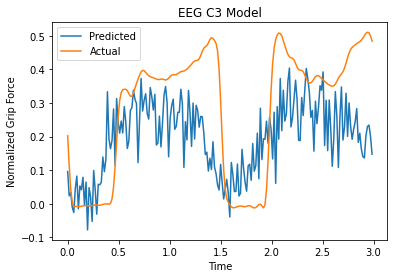

In [79]:
x = [i*3/200 for i in range(200)]
plt.plot(x, eeg_c3_predictions[4,:], label='Predicted')
plt.ylabel("Normalized Grip Force")
plt.xlabel("Time")
plt.title('EEG C3 Model')
plt.plot(x, frc_y_test[0,4,:], label='Actual')
plt.legend()

In [55]:
frc_y_train.shape

(1, 2016, 200)

In [56]:
## EEG Right Hemisphere Channel Models

n_epochs= 30
n_batch_size = int(2016/4)

## Channel 13 (Left Hemisphere)

eeg_channel = 12

input_eeg12 = Input(shape=(10,200))
hidden_eeg12 = LSTM(200,activation="relu")(input_eeg12)
output_eeg12 = Dense(200,name="output")(hidden_eeg12)


eeg12_model = Model(inputs=[input_eeg12], outputs=[output_eeg12])

eeg12_model.compile(loss="mse", optimizer=Nadam())

eeg12_history = eeg12_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)


print(round(eeg12_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))


## Channel 14 (Left Hemisphere)

eeg_channel = 13

input_eeg13 = Input(shape=(10,200))
hidden_eeg13 = LSTM(200,activation="relu")(input_eeg13)
output_eeg13 = Dense(200,name="output")(hidden_eeg13)


eeg13_model = Model(inputs=[input_eeg13], outputs=[output_eeg13])

eeg13_model.compile(loss="mse", optimizer=Nadam())

eeg13_history = eeg13_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg13_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))



## Channel 15 (Left Hemisphere)

eeg_channel = 14

input_eeg14 = Input(shape=(10,200))
hidden_eeg14 = LSTM(200,activation="relu")(input_eeg14)
output_eeg14 = Dense(200,name="output")(hidden_eeg14)


eeg14_model = Model(inputs=[input_eeg14], outputs=[output_eeg14])

eeg14_model.compile(loss="mse", optimizer=Nadam())

eeg14_history = eeg14_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg13_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))


## Channel 16 (Left Hemisphere)

eeg_channel = 15

input_eeg15 = Input(shape=(10,200))
hidden_eeg15 = LSTM(200,activation="relu")(input_eeg15)
output_eeg15 = Dense(200,name="output")(hidden_eeg15)


eeg15_model = Model(inputs=[input_eeg15], outputs=[output_eeg15])

eeg15_model.compile(loss="mse", optimizer=Nadam())

eeg15_history = eeg15_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg14_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))



## Channel 17 (Left Hemisphere)

eeg_channel = 16

input_eeg16 = Input(shape=(10,200))
hidden_eeg16 = LSTM(200,activation="relu")(input_eeg16)
output_eeg16 = Dense(200,name="output")(hidden_eeg16)


eeg16_model = Model(inputs=[input_eeg16], outputs=[output_eeg16])

eeg16_model.compile(loss="mse", optimizer=Nadam())

eeg16_history = eeg16_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg16_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))



## Channel 18 (Left Hemisphere)

eeg_channel = 17

input_eeg17 = Input(shape=(10,200))
hidden_eeg17 = LSTM(200,activation="relu")(input_eeg17)
output_eeg17 = Dense(200,name="output")(hidden_eeg17)


eeg17_model = Model(inputs=[input_eeg17], outputs=[output_eeg17])

eeg17_model.compile(loss="mse", optimizer=Nadam())

eeg17_history = eeg17_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg17_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))


## Channel 19 (Left Hemisphere)

eeg_channel = 18

input_eeg18 = Input(shape=(10,200))
hidden_eeg18 = LSTM(200,activation="relu")(input_eeg18)
output_eeg18 = Dense(200,name="output")(hidden_eeg18)


eeg18_model = Model(inputs=[input_eeg18], outputs=[output_eeg18])

eeg18_model.compile(loss="mse", optimizer=Nadam())

eeg18_history = eeg18_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg18_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))



## Channel 20 (Left Hemisphere)

eeg_channel = 19

input_eeg19 = Input(shape=(10,200))
hidden_eeg19 = LSTM(200,activation="relu")(input_eeg19)
output_eeg19 = Dense(200,name="output")(hidden_eeg19)


eeg19_model = Model(inputs=[input_eeg19], outputs=[output_eeg19])

eeg19_model.compile(loss="mse", optimizer=Nadam())

eeg19_history = eeg19_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg19_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))




## Channel 21 (Left Hemisphere)

eeg_channel = 20

input_eeg20 = Input(shape=(10,200))
hidden_eeg20 = LSTM(200,activation="relu")(input_eeg20)
output_eeg20 = Dense(200,name="output")(hidden_eeg20)


eeg20_model = Model(inputs=[input_eeg20], outputs=[output_eeg20])

eeg20_model.compile(loss="mse", optimizer=Nadam())

eeg20_history = eeg20_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg20_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))




## Channel 22 (Left Hemisphere)

eeg_channel = 21

input_eeg21 = Input(shape=(10,200))
hidden_eeg21 = LSTM(200,activation="relu")(input_eeg21)
output_eeg21 = Dense(200,name="output")(hidden_eeg21)


eeg21_model = Model(inputs=[input_eeg21], outputs=[output_eeg21])

eeg21_model.compile(loss="mse", optimizer=Nadam())

eeg21_history = eeg21_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg21_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))



## Channel 23 (Left Hemisphere)

eeg_channel = 22

input_eeg22 = Input(shape=(10,200))
hidden_eeg22 = LSTM(200,activation="relu")(input_eeg22)
output_eeg22 = Dense(200,name="output")(hidden_eeg22)


eeg22_model = Model(inputs=[input_eeg22], outputs=[output_eeg22])

eeg22_model.compile(loss="mse", optimizer=Nadam())

eeg22_history = eeg22_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg22_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))



## Channel 24 (Left Hemisphere)

eeg_channel = 23

input_eeg23 = Input(shape=(10,200))
hidden_eeg23 = LSTM(200,activation="relu")(input_eeg23)
output_eeg23 = Dense(200,name="output")(hidden_eeg23)


eeg23_model = Model(inputs=[input_eeg23], outputs=[output_eeg23])

eeg23_model.compile(loss="mse", optimizer=Nadam())

eeg23_history = eeg23_model.fit(eeg_train[eeg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(eeg_val[eeg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(eeg23_model.evaluate(eeg_test[eeg_channel,:,:], frc_y_test[0,:,:], verbose=False), 5))

0.03056
0.03112
0.03013
0.03005
0.03076
0.02987
0.02903
0.03051
0.02926
0.02974
0.02765
0.03012


In [57]:
# Lock lowest EEG C4 region model layers 
hidden_eeg12.trainable = False
hidden_eeg13.trainable = False
hidden_eeg14.trainable = False
hidden_eeg15.trainable = False
hidden_eeg16.trainable = False
hidden_eeg17.trainable = False
hidden_eeg18.trainable = False
hidden_eeg19.trainable = False
hidden_eeg20.trainable = False
hidden_eeg21.trainable = False
hidden_eeg22.trainable = False
hidden_eeg23.trainable = False

In [58]:
# EEG Right Hemisphere Model (C4 region)

n_epochs= 4
n_batch_size = int(2016/4)

concat_eeg_c4_1 = concatenate([hidden_eeg12, hidden_eeg13, hidden_eeg14])
hidden_eeg_c4_1 = Dense(200, activation="relu")(concat_eeg_c4_1)
output_eeg_c4_1 = Dense(200, name="output")(hidden_eeg_c4_1)

eeg_c4_1_train = [eeg_train[i,:,:,:] for i in range(12,15)]
eeg_c4_1_val = [eeg_val[i,:,:,:] for i in range(12,15)]

eeg_c4_1_model = Model(inputs=[input_eeg12, input_eeg13, input_eeg14],
                    outputs=[output_eeg_c4_1])
eeg_c4_1_model.compile(loss="mse", optimizer=Nadam())

eeg_c4_1_history = eeg_c4_1_model.fit(eeg_c4_1_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c4_1_val, frc_y_val[0,:,:]),
                                  verbose=False)




concat_eeg_c4_2 = concatenate([hidden_eeg15, hidden_eeg16, hidden_eeg17])
hidden_eeg_c4_2 = Dense(200, activation="relu")(concat_eeg_c4_2)
output_eeg_c4_2 = Dense(200, name="output")(hidden_eeg_c4_2)

eeg_c4_2_train = [eeg_train[i,:,:,:] for i in range(15,18)]
eeg_c4_2_val = [eeg_val[i,:,:,:] for i in range(15,18)]

eeg_c4_2_model = Model(inputs=[input_eeg15, input_eeg16, input_eeg17],
                    outputs=[output_eeg_c4_2])
eeg_c4_2_model.compile(loss="mse", optimizer=Nadam())

eeg_c4_2_history = eeg_c4_2_model.fit(eeg_c4_2_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c4_2_val, frc_y_val[0,:,:]),
                                  verbose=False)




concat_eeg_c4_3 = concatenate([hidden_eeg18, hidden_eeg19, hidden_eeg20])
hidden_eeg_c4_3 = Dense(200, activation="relu")(concat_eeg_c4_3)
output_eeg_c4_3 = Dense(200, name="output")(hidden_eeg_c4_3)

eeg_c4_3_train = [eeg_train[i,:,:,:] for i in range(18,21)]
eeg_c4_3_val = [eeg_val[i,:,:,:] for i in range(18,21)]

eeg_c4_3_model = Model(inputs=[input_eeg18, input_eeg19, input_eeg20],
                    outputs=[output_eeg_c4_3])
eeg_c4_3_model.compile(loss="mse", optimizer=Nadam())

eeg_c4_3_history = eeg_c4_3_model.fit(eeg_c4_3_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c4_3_val, frc_y_val[0,:,:]),
                                  verbose=False)




concat_eeg_c4_4 = concatenate([hidden_eeg21, hidden_eeg22, hidden_eeg23])
hidden_eeg_c4_4 = Dense(200, activation="relu")(concat_eeg_c4_4)
output_eeg_c4_4 = Dense(200, name="output")(hidden_eeg_c4_4)

eeg_c4_4_train = [eeg_train[i,:,:,:] for i in range(21,24)]
eeg_c4_4_val = [eeg_val[i,:,:,:] for i in range(21,24)]

eeg_c4_4_model = Model(inputs=[input_eeg21, input_eeg22, input_eeg23],
                    outputs=[output_eeg_c4_4])
eeg_c4_4_model.compile(loss="mse", optimizer=Nadam())

eeg_c4_4_history = eeg_c4_4_model.fit(eeg_c4_4_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c4_4_val, frc_y_val[0,:,:]),
                                  verbose=False)

In [59]:
hidden_eeg_c4_1.trainable = False
hidden_eeg_c4_2.trainable = False
hidden_eeg_c4_3.trainable = False
hidden_eeg_c4_4.trainable = False

In [ ]:
#### train full EEG C4 model with lowest layers locked

n_epochs= 10
n_batch_size = int(2016/4)

concat_eeg_c4 = concatenate([hidden_eeg_c4_1, hidden_eeg_c4_2,
                            hidden_eeg_c4_3, hidden_eeg_c4_4])

hidden1_eeg_c4 = Dense(400, activation="relu")(concat_eeg_c4)
BN_eeg_c4 = BatchNormalization()(hidden1_eeg_c4)
hidden2_eeg_c4 = Dense(400, activation="relu")(BN_eeg_c4)
output_eeg_c4 = Dense(200, name="output")(hidden2_eeg_c4)


inputs_eeg_c4 = [input_eeg12, input_eeg13, input_eeg14, input_eeg15,
                 input_eeg16, input_eeg17, input_eeg18, input_eeg19,
                 input_eeg20, input_eeg21, input_eeg22, input_eeg23]

eeg_c4_model = Model(inputs=inputs_eeg_c4,
                    outputs=[output_eeg_c4])

eeg_c4_train = [eeg_train[i,:,:,:] for i in range(12)]
eeg_c4_val = [eeg_val[i,:,:,:] for i in range(12)]

eeg_c4_model.compile(loss="mse", optimizer=Nadam())

eeg_c4_history = eeg_c4_model.fit(eeg_c4_train,
                                  frc_y_train[0,:,:],
                                  epochs=n_epochs, batch_size = n_batch_size,
                                  validation_data=(eeg_c4_val, frc_y_val[0,:,:]),
                                  verbose=True)

Epoch 1/10


In [ ]:
eeg_c4_test = [eeg_test[i,:,:,:] for i in range(12)]
round(eeg_c4_model.evaluate(eeg_c4_test, frc_y_test[0,:,:], verbose=False), 5)

# EMG Model

In [41]:
from keras.layers import Input, Dense, Conv1D, concatenate, BatchNormalization, LSTM
from keras import Model
from keras.optimizers import SGD, Nadam

In [42]:
# EMG channel models

## Channel 1

n_epochs = 30
n_batch_size = int((2016)/4)

emg_channel = 0

input_emg0 = Input(shape=(10,200))
hidden_emg0 = LSTM(200,activation="relu")(input_emg0)
output_emg0 = Dense(200,name="output")(hidden_emg0)

emg0_model = Model(inputs=[input_emg0], outputs=[output_emg0])
emg0_model.compile(loss="mse", optimizer=Nadam())
emg0_history = emg0_model.fit(emg_train[emg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(emg_val[emg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)


print(round(emg0_model.evaluate(emg_test[emg_channel], frc_y_test[0,:,:], verbose=False), 5))

## Channel 2

emg_channel = 1

input_emg1 = Input(shape=(10,200))
hidden_emg1 = LSTM(200,activation="relu")(input_emg1)
output_emg1 = Dense(200,name="output")(hidden_emg1)

emg1_model = Model(inputs=[input_emg1], outputs=[output_emg1])
emg1_model.compile(loss="mse", optimizer=Nadam())
emg1_history = emg1_model.fit(emg_train[emg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(emg_val[emg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(emg1_model.evaluate(emg_test[emg_channel], frc_y_test[0,:,:], verbose=False), 5))


## Channel 3

emg_channel = 2

input_emg2 = Input(shape=(10,200))
hidden_emg2 = LSTM(200,activation="relu")(input_emg2)
output_emg2 = Dense(200,name="output")(hidden_emg2)

emg2_model = Model(inputs=[input_emg2], outputs=[output_emg2])
emg2_model.compile(loss="mse", optimizer=Nadam())
emg2_history = emg2_model.fit(emg_train[emg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(emg_val[emg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(emg2_model.evaluate(emg_test[emg_channel], frc_y_test[0,:,:], verbose=False), 5))


## Channel 4

emg_channel = 3

input_emg3 = Input(shape=(10,200))
hidden_emg3 = LSTM(200,activation="relu")(input_emg3)
output_emg3 = Dense(200,name="output")(hidden_emg3)

emg3_model = Model(inputs=[input_emg3], outputs=[output_emg3])
emg3_model.compile(loss="mse", optimizer=Nadam())
emg3_history = emg3_model.fit(emg_train[emg_channel,:,:],
                              frc_y_train[0,:,:],
                              epochs=n_epochs, batch_size = n_batch_size,
                              validation_data=(emg_val[emg_channel,:,:], frc_y_val[0,:,:]),
                              verbose=False)

print(round(emg3_model.evaluate(emg_test[emg_channel], frc_y_test[0,:,:], verbose=False), 5))

0.02654
0.02589
0.02573
0.02634


In [43]:
# Full EMG Model

n_epochs= 20
n_batch_size = int(2016/4)

concat_emg = concatenate([hidden_emg0, hidden_emg1, hidden_emg2, hidden_emg3])
hidden1_emg = Dense(400, activation="relu")(concat_emg)
BN_emg = BatchNormalization()(hidden1_emg)
hidden2_emg = Dense(200, activation="relu")(BN_emg)
output_emg = Dense(200, name="output")(hidden2_emg)


emg_model = Model(inputs=[input_emg0, input_emg1, input_emg2, input_emg3], 
                  outputs=[output_emg])

emg_model.compile(loss="mse", optimizer=Nadam())

emg_history = emg_model.fit([emg_train[0,:,:], emg_train[1,:,:], 
                             emg_train[2,:,:], emg_train[3,:,:]],
                                      frc_y_train[0,:,:],
                                      epochs=n_epochs, batch_size = n_batch_size,
                                      validation_data=([emg_val[0,:,:], emg_val[1,:,:], 
                                                        emg_val[2,:,:], emg_val[3,:,:]], 
                                                       frc_y_val[0,:,:]),
                                      verbose=True)

Epoch 1/20
4/4 [==============================] - 4s 397ms/step - loss: 0.0589 - val_loss: 0.0469
Epoch 2/20
4/4 [==============================] - 1s 289ms/step - loss: 0.0340 - val_loss: 0.0438
Epoch 3/20
4/4 [==============================] - 1s 276ms/step - loss: 0.0285 - val_loss: 0.0406
Epoch 4/20
4/4 [==============================] - 1s 274ms/step - loss: 0.0238 - val_loss: 0.0377
Epoch 5/20
4/4 [==============================] - 1s 302ms/step - loss: 0.0209 - val_loss: 0.0357
Epoch 6/20
4/4 [==============================] - 1s 294ms/step - loss: 0.0188 - val_loss: 0.0338
Epoch 7/20
4/4 [==============================] - 1s 268ms/step - loss: 0.0174 - val_loss: 0.0323
Epoch 8/20
4/4 [==============================] - 1s 285ms/step - loss: 0.0171 - val_loss: 0.0322
Epoch 9/20
4/4 [==============================] - 1s 267ms/step - loss: 0.0168 - val_loss: 0.0320
Epoch 10/20
4/4 [==============================] - 1s 282ms/step - loss: 0.0156 - val_loss: 0.0317
Epoch 11/20
4/4 [==

In [44]:
emg_test = [emg_test[i,:,:,:] for i in range(4)]
round(emg_model.evaluate(emg_test, frc_y_test[0,:,:], verbose=False), 5)

0.02775

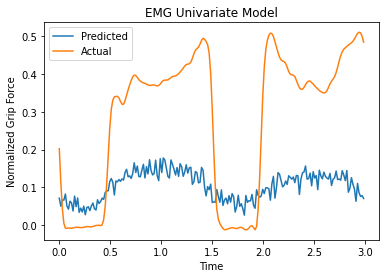

In [50]:
emg_predictions = emg_model.predict(emg_test)

x = [i*3/200 for i in range(200)]
plt.plot(x, emg_predictions[4,:], label='Predicted')
plt.ylabel("Normalized Grip Force")
plt.xlabel("Time")
plt.title('EMG Univariate Model')
plt.plot(x, frc_y_test[0,4,:], label='Actual')
plt.legend()

# Full Model

In [2]:
# fNIRS-EEG sub-model
n_epochs= 4
n_batch_size = int(2016/4)

## fNIRS-EEG Left Hemisphere (C3 region)

concat_nirs_eeg_c3 = concatenate([hidden2_eeg_c3, hidden_nirs_c3])
hidden1_nirs_eeg_c3 = Dense(400, activation="relu")(concat_nirs_eeg_c3)
BN_nirs_eeg_c3 = BatchNormalization()(hidden1_nirs_eeg_c3)
hidden2_nirs_eeg_c3 = Dense(200, activation="relu")(BN_nirs_eeg_c3)
output_nirs_eeg_c3 = Dense(200, name="output")(hidden2_nirs_eeg_c3)

inputs_nirs_eeg_c3 = inputs_nirs_c3 + inputs_eeg_c3

nirs_eeg_c3_model = Model(inputs=inputs_nirs_eeg_c3, outputs=output_nirs_eeg_c3)
nirs_eeg_c3_model.compile(loss="mse", optimizer=Nadam())

nirs_eeg_c3_train = nirs_c3_train + eeg_c3_train
nirs_eeg_c3_val = nirs_c3_val + eeg_c3_val

nirs_eeg_c3_history = nirs_eeg_c3_model.fit(nirs_eeg_c3_train, frc_y_train[0,:,:], 
                            epochs=n_epochs, batch_size = n_batch_size,
                            validation_data=(nirs_eeg_c3_val, frc_y_val[0,:,:]),
                            verbose=True)

NameError: name 'concatenate' is not defined

In [1]:
nirs_eeg_c3_model.predict(nirs_eeg_c3_train)

NameError: name 'nirs_eeg_c3_model' is not defined

In [ ]:
nirs_eeg_c3_test = nirs_c3_train + eeg_c3_train
round(emg_model.evaluate(nirs_eeg_c3_test, frc_y_test[0,:,:], verbose=False), 5)

In [ ]:
# fNIRS-EEG sub-model
n_epochs= 4
n_batch_size = int(2016/4)

## fNIRS-EEG Left Hemisphere (C3 region)

concat_nirs_eeg_c3 = concatenate([hidden2_eeg_c3, hidden_nirs_c3])
hidden1_nirs_eeg_c3 = Dense(400, activation="relu")(concat_nirs_eeg_c3)
BN_nirs_eeg_c3 = BatchNormalization()(hidden1_nirs_eeg_c3)
hidden2_nirs_eeg_c3 = Dense(200, activation="relu")(BN_nirs_eeg_c3)
output_nirs_eeg_c3 = Dense(200, name="output")(hidden2_nirs_eeg_c3)

inputs_nirs_eeg_c3 = inputs_nirs_c3 + inputs_eeg_c3

nirs_eeg_c3_model = Model(inputs=inputs_nirs_eeg_c3, outputs=output_nirs_eeg_c3)
nirs_eeg_c3_model.compile(loss="mse", optimizer=Nadam())

nirs_eeg_c3_train = nirs_c3_train + eeg_c3_train
nirs_eeg_c3_val = nirs_c3_val + eeg_c3_val

nirs_eeg_c3_history = nirs_eeg_c3_model.fit(nirs_eeg_c3_train, frc_y_train[0,:,:], 
                            epochs=n_epochs, batch_size = n_batch_size,
                            validation_data=(nirs_eeg_c3_val, frc_y_val[0,:,:]),
                            verbose=True)